In [4]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

experiments_number = 30
step_rate = 10
evo_boxes = []
for step in range(step_rate-1, 80, step_rate):
    tmp_box = []
    for exp in range(experiments_number):
        with open(f'exp_archives/sa_archive_{exp}.pickle', 'rb') as f:
                        archive = pickle.load(f)
                        f.close()
        evo_fitnes_history = archive['evo_fitnes_history']
        evo_fitnes_history = [val for val in evo_fitnes_history]

        tmp_box.append(evo_fitnes_history[step])
    evo_boxes.append(tmp_box)

evo_sa_boxes = []
sa_boxes = []


for step in range(19, 80, 20):
    tmp_box_evo = []
    tmp_box_sa = []
    for exp in range(experiments_number):
        with open(f'exp_archives/sa_archive_{exp}.pickle', 'rb') as f:
                        archive = pickle.load(f)
                        f.close()
        evo_fitnes_history = archive['evo_fitnes_history']
        evo_fitnes_history = [val for val in evo_fitnes_history]
        evo_time_history = archive['evo_time_history']

        sa_history = archive[f'sa_step_{step}']
        sa_time_history = sa_history[f'sa_time_{step}']
        sa_fitnes_history = sa_history[f'sa_fitnes_{step}']
        sa_fitnes_history = [val for val in sa_fitnes_history]

        last_point_sa = sa_time_history[-1]
        last_timepoint_evo = min(evo_time_history, key=lambda x: abs(x-last_point_sa))
        index_evo_lastpoint = evo_time_history.index(last_timepoint_evo)

        evo_result = evo_fitnes_history[index_evo_lastpoint]
        sa_result = sa_fitnes_history[-1]

        tmp_box_evo.append(evo_result)
        tmp_box_sa.append(sa_result)

    evo_sa_boxes.append(tmp_box_evo)
    sa_boxes.append(tmp_box_sa)

evo_sa_boxes = evo_sa_boxes[:-1]

Text(6.96, 5.5, 'put to Sensitivity Analysis')

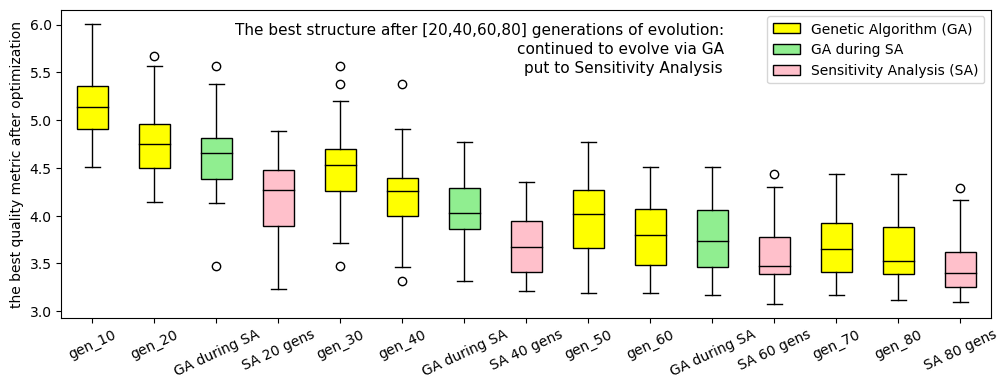

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
ax.tick_params(axis='x', labelrotation=25)
ax.set_ylabel('the best quality metric after optimization')
space = 0.3

evo_labels = [f'gen_{i}' for i in range(10,81,10)]
bplot = ax.boxplot(evo_boxes, positions=[0,1,4,5,8,9,12,13], patch_artist=True, labels=evo_labels)
for patch, mediana in zip(bplot['boxes'], bplot['medians']):
    patch.set_facecolor('yellow')
    mediana.set_color('black')

evo_sa_labels = ['GA during SA' for _ in range(len(evo_sa_boxes))]
bplot2 = ax.boxplot(evo_sa_boxes, positions=[2,6,10], patch_artist=True, labels=evo_sa_labels)
for patch, mediana in zip(bplot2['boxes'], bplot2['medians']):
    patch.set_facecolor('lightgreen')
    mediana.set_color('black')

sa_labels = [f'SA {_} gens' for _ in [20,40,60,80]]
bplot3 = ax.boxplot(sa_boxes, positions=[3,7,11,14], patch_artist=True, labels=sa_labels)
for patch, mediana in zip(bplot3['boxes'], bplot3['medians']):
    patch.set_facecolor('pink')
    mediana.set_color('black')

ax.legend([bplot["boxes"][0], bplot2["boxes"][0], bplot3["boxes"][0]], ["Genetic Algorithm (GA)", "GA during SA", "Sensitivity Analysis (SA)"], loc='upper right')
plt.text(2.3, 5.9, 'The best structure after [20,40,60,80] generations of evolution:', fontsize=11)
plt.text(6.85, 5.7, 'continued to evolve via GA', fontsize=11)
plt.text(6.96, 5.5, 'put to Sensitivity Analysis', fontsize=11)